In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [5]:
# Load dataset
df = pd.read_csv('customers_hc.csv')
print(df)

    CustomerID  AnnualIncome  SpendingScore
0            1            15             39
1            2            16             81
2            3            17              6
3            4            18             77
4            5            19             40
5            6            20             76
6            7            21              6
7            8            22             94
8            9            23              3
9           10            24             72
10          11            25             14
11          12            26             99
12          13            27             15
13          14            28             77
14          15            29             13
15          16            30             79
16          17            31             35
17          18            32             66
18          19            33             29
19          20            34             98


In [7]:
#  Select features
X = df[['AnnualIncome', 'SpendingScore']]


In [9]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
# Create linkage matrix
linked = linkage(X_scaled, method='ward')

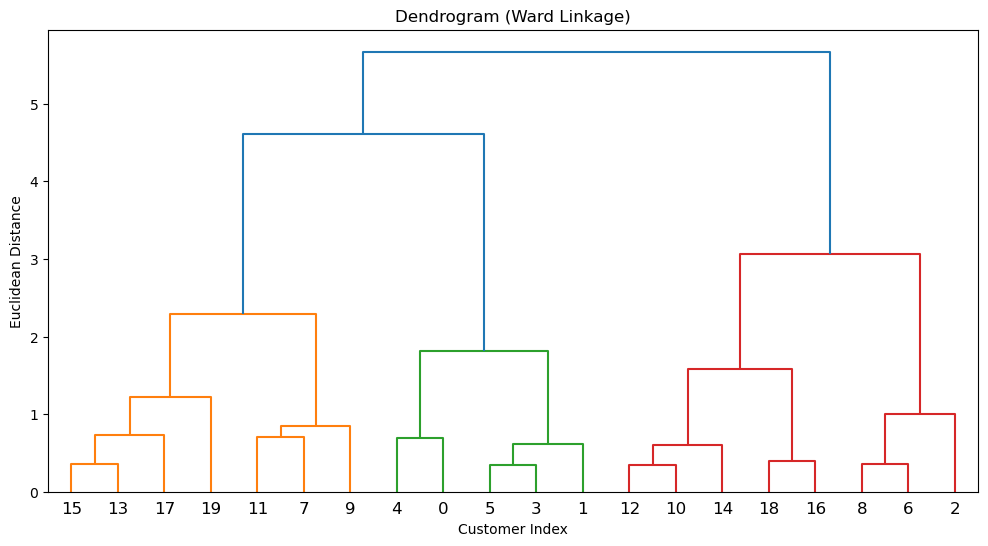

In [13]:
# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrogram (Ward Linkage)')
plt.xlabel('Customer Index')
plt.ylabel('Euclidean Distance')
plt.show()


In [15]:
# Cut the dendrogram at k clusters (e.g., k = 3)
k = 3
df['Cluster'] = fcluster(linked, k, criterion='maxclust')

print(df)

    CustomerID  AnnualIncome  SpendingScore  Cluster
0            1            15             39        2
1            2            16             81        2
2            3            17              6        1
3            4            18             77        2
4            5            19             40        2
5            6            20             76        2
6            7            21              6        1
7            8            22             94        3
8            9            23              3        1
9           10            24             72        3
10          11            25             14        1
11          12            26             99        3
12          13            27             15        1
13          14            28             77        3
14          15            29             13        1
15          16            30             79        3
16          17            31             35        1
17          18            32             66   

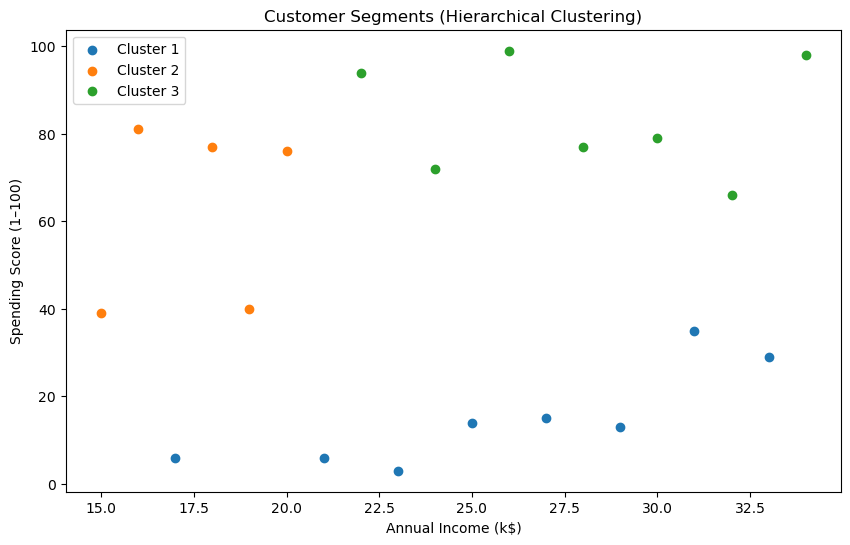

In [17]:
# Visualize clusters
plt.figure(figsize=(10, 6))
for cluster in range(1, k + 1):
    plt.scatter(
        df[df['Cluster'] == cluster]['AnnualIncome'],
        df[df['Cluster'] == cluster]['SpendingScore'],
        label=f'Cluster {cluster}'
    )

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1–100)')
plt.title('Customer Segments (Hierarchical Clustering)')
plt.legend()
plt.show()